# Plan
- Data Cleaning and Preparation
- Exploratory Data Analysis (EDA)
- Job Market Analysis
- Company Analysis
- Location-based Analysis-
- Time Series Analysis
- Visualization and Reporting

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np

import re

import matplotlib.pyplot as plt
import seaborn as sns

D:\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('jobs.csv')
df

,Job Name,Company Name,Location,Date Posted,Job Specialization,Job Type,Job Link
0,Email & Back Office Support • 100% Non-Voice,TRANSEC BPO SOLUTIONS INC.,National Capital Reg,4/13/2023,Services,Full-Time,https://www.jobstreet.com.ph/en/job/email-back...
1,Bank Teller,Metropolitan Bank & Trust Company,"Cagayan (Tuguegarao City), Isabela",4/13/2023,Services,Full-Time,https://www.jobstreet.com.ph/en/job/bank-telle...
2,Bank Teller (Bataan),Metropolitan Bank & Trust Company,Bataan (Others),4/13/2023,Services,Full-Time,https://www.jobstreet.com.ph/en/job/bank-telle...
3,Quality Assurance Staff,MERALCO,Pasig City,4/13/2023,Services,Full-Time,https://www.jobstreet.com.ph/en/job/quality-as...
4,EXPERIENCED OFFICE STAFF,Diversfied Agrochemicals Trading Corp.,Quezon City,4/13/2023,Services,Full-Time,https://www.jobstreet.com.ph/en/job/experience...
...,...,...,...,...,...,...,...
54569,Outbound na Ahente ng Call Center,METACOM BUSINESS PROCESS OUTSOURCING SOLUTIONS,"Quezon, Quezon City",3/19/2023,Computer/Information Technology,Full-Time,https://www.jobstreet.com.ph/en/job/outbound-n...
54570,"Director, Transport (Smart Mobility Solutions)",Asian Development Bank (ADB),National Capital Reg,3/19/2023,Computer/Information Technology,Full-Time,https://www.jobstreet.com.ph/en/job/director-t...
54571,Vice President – Investment Middle Office Serv...,JPMorgan Chase Bank NA - Philippine Global Ser...,National Capital Reg,3/19/2023,Computer/Information Technology,Full-Time,https://www.jobstreet.com.ph/en/job/vice-presi...
54572,Treasury Senior Specialist - Japanese Speaker,Manulife Philippines,"Quezon, Quezon City",3/23/2023,Computer/Information Technology,Full-Time,https://www.jobstreet.com.ph/en/job/treasury-s...


## Data Cleaning and Preparation


### To do
---
- Check for missing values
    - Check the dataset for any missing values in any of the columns
- Check for duplicates
    - Check the dataset for any duplicate rows
- Standardize column names
    - Check if the column names are consistent across the dataset
- Data type conversion
    - Check if each column has the correct data type
- Data normalization
    -  Check if any columns need to be normalized
- Removing irrelevant columns
    -  Identify any columns that are not relevant to this analysis

In [3]:
# Check for missing values
for column in df.columns:
    print(f'{column} - {round(np.mean(df[column].isnull()) * 100)}%')

Job Name - 0%
Company Name - 0%
Location - 0%
Date Posted - 0%
Job Specialization - 0%
Job Type - 0%
Job Link - 0%


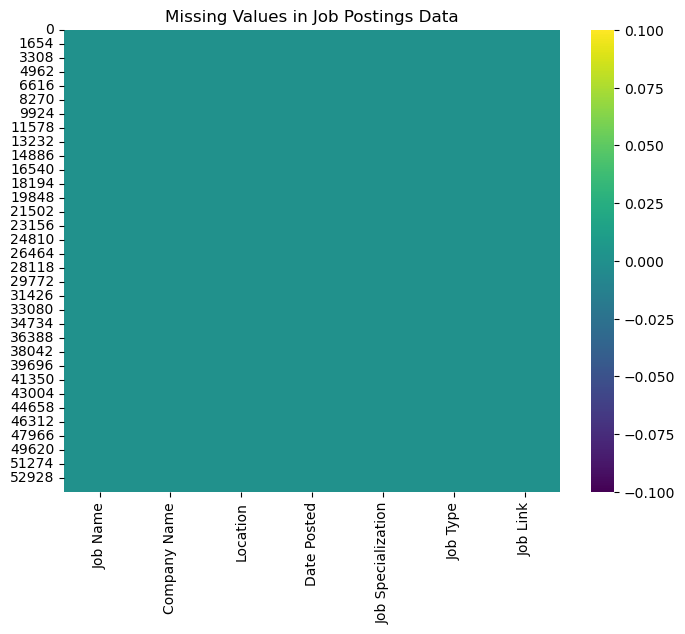

In [4]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), cmap='viridis')
plt.title('Missing Values in Job Postings Data')
plt.show()

In [5]:
# Check for duplicates
print(df.duplicated().sum())

0


In [6]:
# Standardize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['job_name', 'company_name', 'location', 'date_posted',
       'job_specialization', 'job_type', 'job_link'],
      dtype='object')

In [7]:
# Data type conversion
df['date_posted'] = pd.to_datetime(df['date_posted'])

In [8]:
# Data normalization

## normalize the values in lowercase
df = df.apply(lambda x: x.str.lower() if x.dtype == "object" else x)
df.head()

,job_name,company_name,location,date_posted,job_specialization,job_type,job_link
0,email & back office support • 100% non-voice,transec bpo solutions inc.,national capital reg,2023-04-13,services,full-time,https://www.jobstreet.com.ph/en/job/email-back...
1,bank teller,metropolitan bank & trust company,"cagayan (tuguegarao city), isabela",2023-04-13,services,full-time,https://www.jobstreet.com.ph/en/job/bank-telle...
2,bank teller (bataan),metropolitan bank & trust company,bataan (others),2023-04-13,services,full-time,https://www.jobstreet.com.ph/en/job/bank-telle...
3,quality assurance staff,meralco,pasig city,2023-04-13,services,full-time,https://www.jobstreet.com.ph/en/job/quality-as...
4,experienced office staff,diversfied agrochemicals trading corp.,quezon city,2023-04-13,services,full-time,https://www.jobstreet.com.ph/en/job/experience...


In [9]:
## transforming the format of the job_name and location by generalizing it
df.job_name = df.job_name.apply(lambda text: re.search(r'\b([A-Za-z]+\s*)+\b', text).group(0) if re.search(r'\b([A-Za-z]+\s*)+\b', text) else text)
df.location = df.location.apply(lambda text: re.search(r'\b([A-Za-z]+\s*)+\b', text).group(0) if re.search(r'\b([A-Za-z]+\s*)+\b', text) else text)

In [10]:
# Removing irrelevant columns
df = df.drop('job_link', axis=1)

## Exploratory Data Analysis (EDA)

### To do
---
- Univariate Analysis
  - Showing the frequency of each categorical variable
- Bivariate Analysis
  - Exploring the relationship between pairs of variables in the dataset
- Interpret the results
  - Understanding the findings


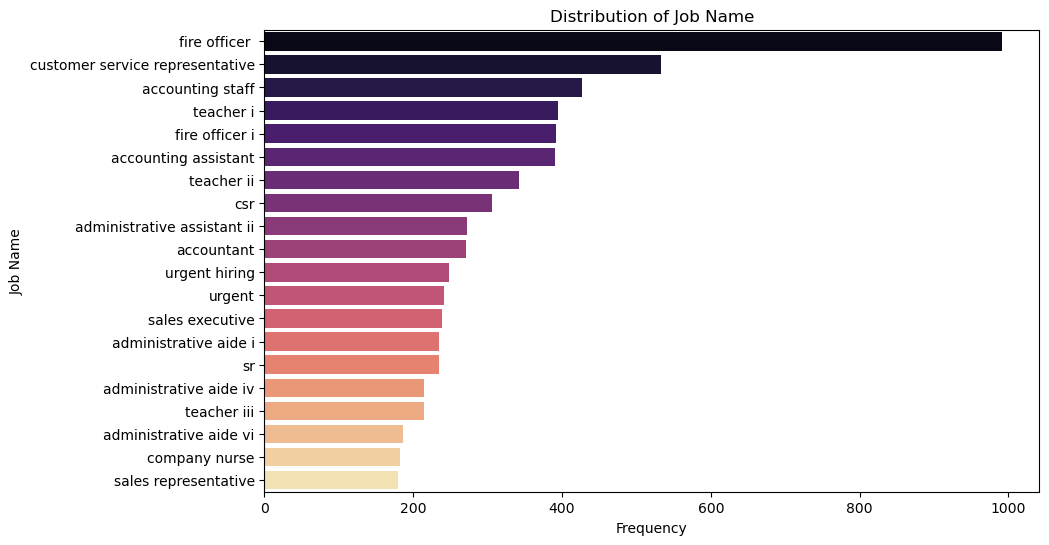

In [50]:
## Univariate Analysis
job_specialization_counts = df['job_name'].value_counts().nlargest(20)

# create horizontal bar plot with seaborn
plt.figure(figsize=(10,6))
sns.barplot(x=job_specialization_counts.values, y=job_specialization_counts.index, palette='magma')
plt.title('Distribution of Job Name')
plt.xlabel('Frequency')
plt.ylabel('Job Name')
plt.show()

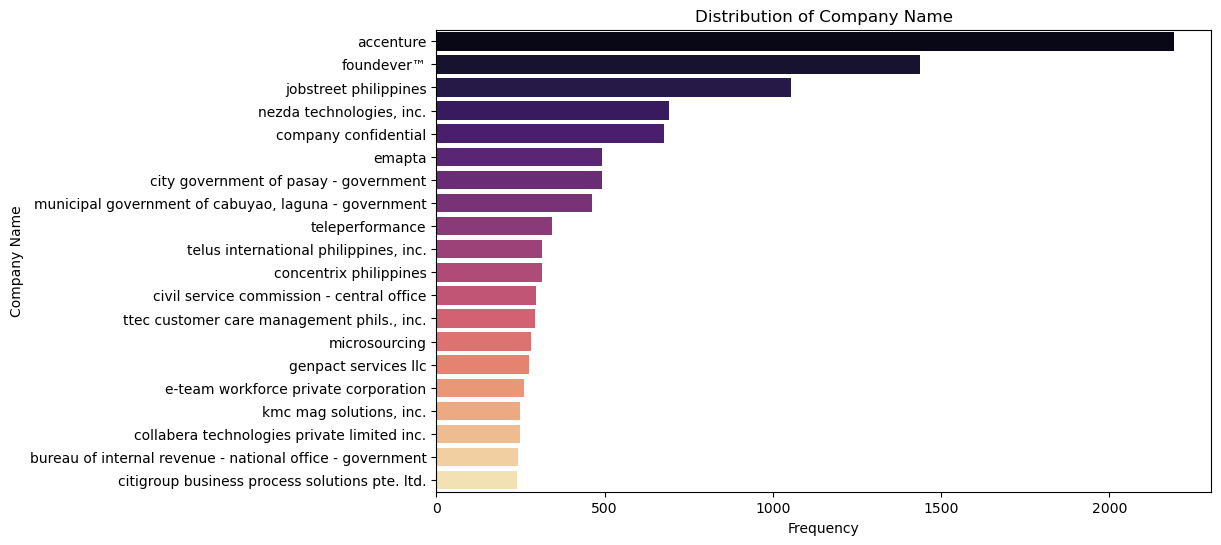

In [51]:
job_specialization_counts = df['company_name'].value_counts().nlargest(20)

# create horizontal bar plot with seaborn
plt.figure(figsize=(10,6))
sns.barplot(x=job_specialization_counts.values, y=job_specialization_counts.index, palette='magma')
plt.title('Distribution of Company Name')
plt.xlabel('Frequency')
plt.ylabel('Company Name')
plt.show()

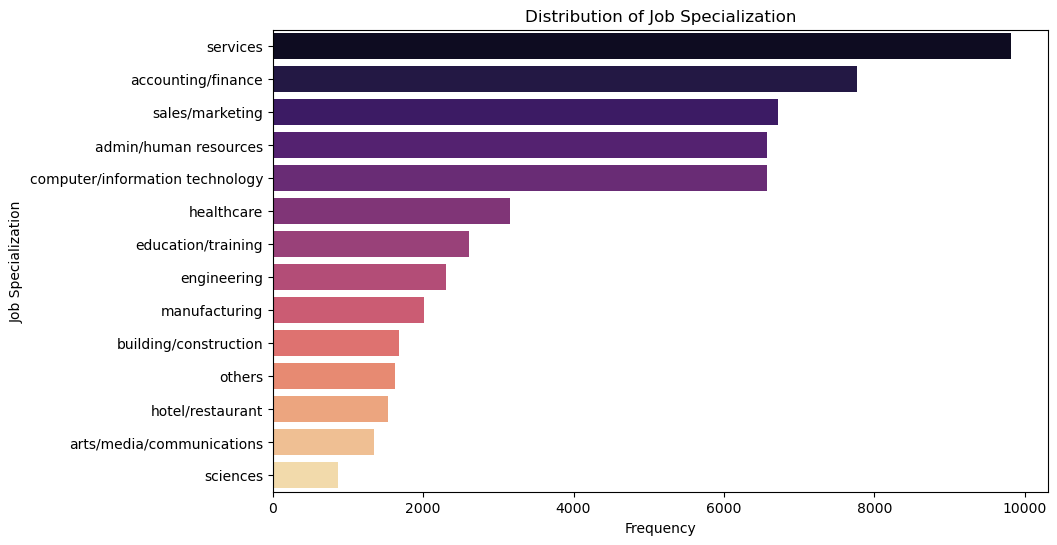

In [52]:
job_specialization_counts = df['job_specialization'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=job_specialization_counts.values, y=job_specialization_counts.index, palette='magma')
plt.title('Distribution of Job Specialization')
plt.xlabel('Frequency')
plt.ylabel('Job Specialization')
plt.show()

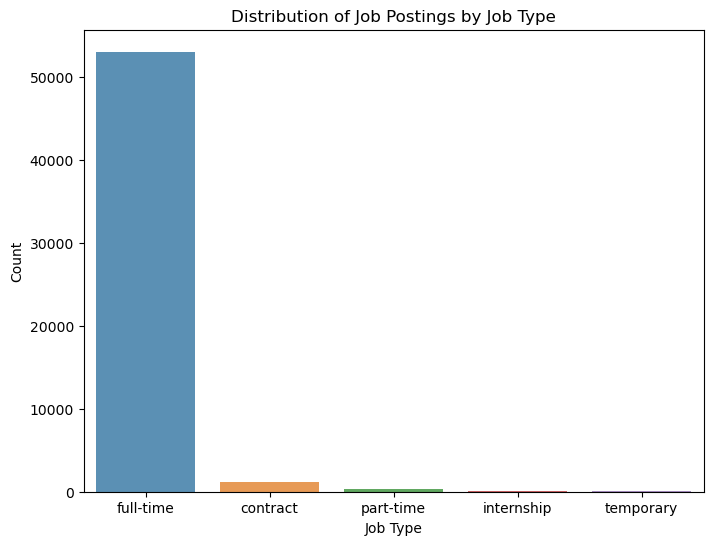

In [118]:
## Bivariate Analysis
job_type_counts = df['job_type'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=job_type_counts.index, y=job_type_counts.values, alpha=0.8)
plt.title('Distribution of Job Postings by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.show()


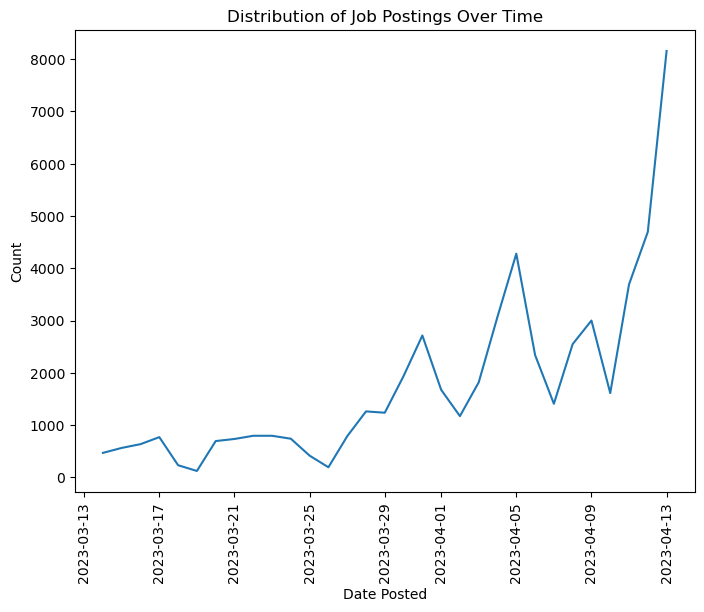

In [86]:
job_postings_by_date = df.groupby('date_posted').size().reset_index(name='count')
plt.figure(figsize=(8,6))
sns.lineplot(x='date_posted', y='count', data=job_postings_by_date)
plt.title('Distribution of Job Postings Over Time')
plt.xlabel('Date Posted')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

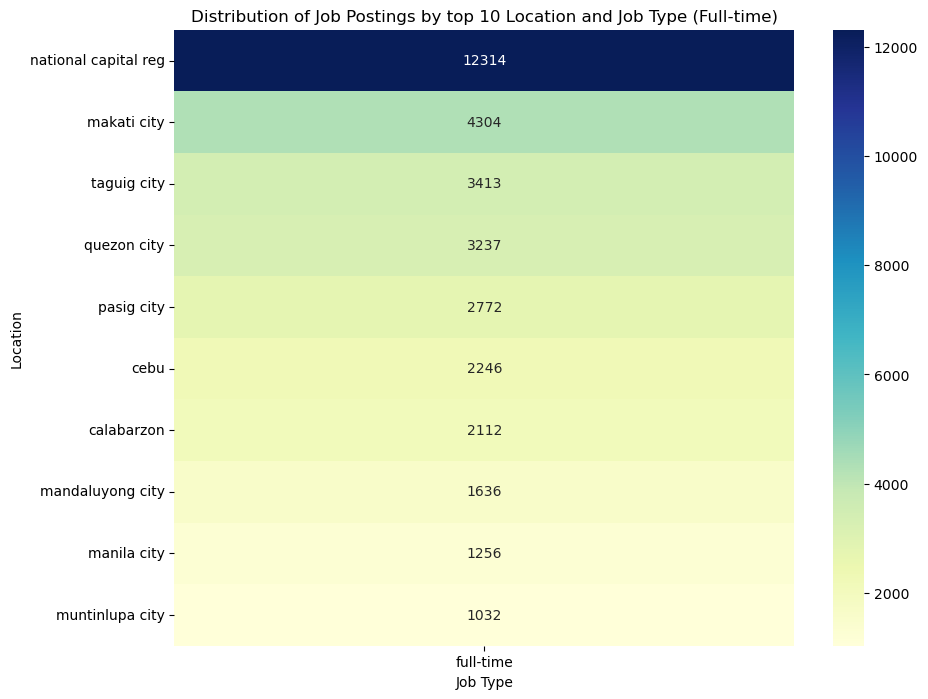

In [116]:
job_postings_by_location_and_type = df.groupby(['location', 'job_type']).size().nlargest(10).unstack(fill_value=0)
plt.figure(figsize=(10,8))
sns.heatmap(job_postings_by_location_and_type, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Distribution of Job Postings by top 10 Location and Job Type (Full-time)')
plt.xlabel('Job Type')
plt.ylabel('Location')
plt.show()

<AxesSubplot:xlabel='job_type', ylabel='job_specialization'>

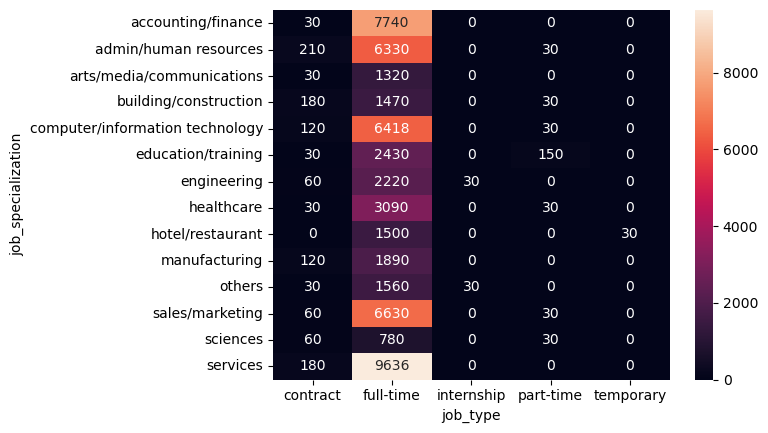

In [117]:
contingency_table = pd.crosstab(df.job_specialization, df.job_type)
sns.heatmap(contingency_table, annot=True, fmt='d')